<a href="https://colab.research.google.com/github/appodsvirov/3D_ML_opencv/blob/main/Opencv_lab3_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1: На занятии мы разбирали, как осуществить поворот изображения с помощью матрицы поворота. Однако мы с вами заметили, что поворот происходит относительно нуля координат, что может приводить не совсем к тому результату, который мы ожидаем получить. Задача состоит в том, чтобы повернуть изображение относительно его центра (а не начала координат). Подсказка: вспомните идею решения, которую мы обсуждали на занятии - необходимо сделать перенос центра изображения в начало СК, затем осуществить поворот, а затем перенести обратно в центр. Дополнительный вопрос: можем ли мы эти три преобразования соединить в одно? Другими словами, построить композицию преобразований в виде единой матрицы? Как это сделать? Для проведения экспериментов используйте изображение messi5.jpg

Задание 2: В папке находятся изображения (все кроме messi5.jpg), которые были подвернуты различным деформациям. Используя аффинные преобразования, необходимо "выправить" эти изображения (привести в исходный вид).


In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos, pi

In [5]:
apple= cv.cvtColor(cv.imread('/content/apple.jpg'),cv.COLOR_BGR2RGB)
messi5= cv.cvtColor(cv.imread('/content/messi5.jpg'),cv.COLOR_BGR2RGB)
phone= cv.cvtColor(cv.imread('/content/phone.png'),cv.COLOR_BGR2RGB)
skull= cv.cvtColor(cv.imread('/content/skull.png'),cv.COLOR_BGR2RGB)
text= cv.cvtColor(cv.imread('/content/text.png'),cv.COLOR_BGR2RGB)

In [114]:
#Translation
def T(tx, ty):
  return np.float32([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]]
  )

#Translation^-1 @ Rotation @ Translation
def R(angle, height, width):
  angle = angle * pi / 180
  rot = np.float32([
    [cos(angle), -sin(angle), 0],
    [sin(angle), cos(angle), 0],
    [0, 0, 1]]
  )

  return T(width/2, height/2)@rot@T(-width/2, -height/2)

#Shear
def Sh(lx, ly):
  return np.float32([
    [1, lx, 0],
    [ly, 1, 0],
    [0, 0, 1]]
  )

#Reflection X
def M(height, width):
    return np.float32([
    [-1, 0, width],
    [0, 1, 0],
    [0, 0, 1]]
  )

#Scale
def Sc(lx, ly):
    return np.float32([
    [lx, 0, 0],
    [0, ly, 0],
    [0, 0, 1]]
  )

def solve_and_print(img, Tesor, height, width):
  plt.imshow(cv.warpAffine(img, Tesor[0:2], (width, height)))

#Задание 1
Повернуть изображение относительно его центра (а не начала координат)

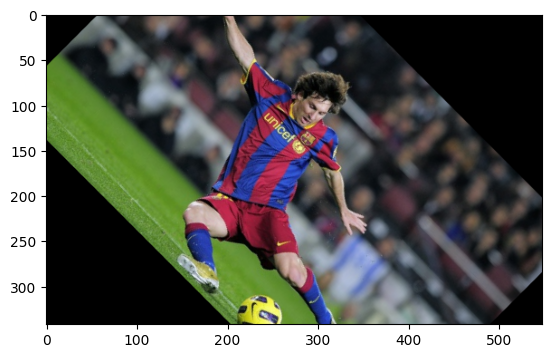

In [115]:
height, width = messi5.shape[:2]

solve_and_print(messi5, R(45, height, width), height, width)

#Яблоко

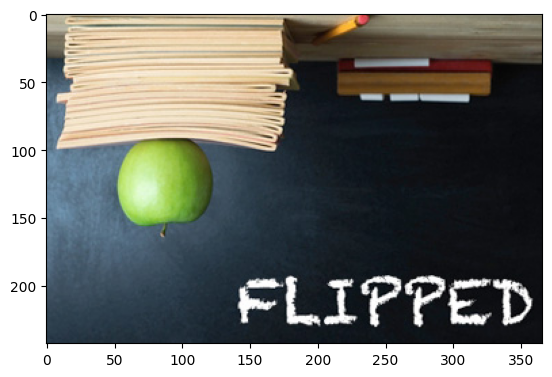

In [116]:
plt.imshow(apple)

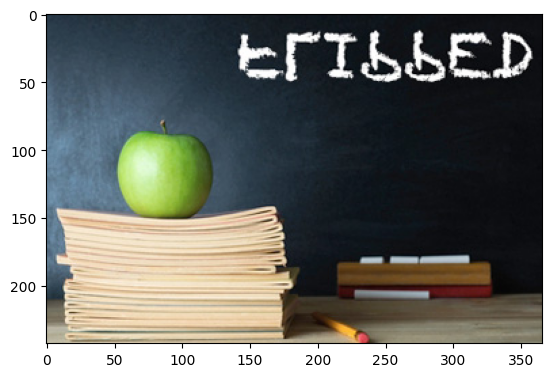

In [117]:
height, width = apple.shape[:2]
solve_and_print(apple, M(height, width)@R(180, height, width), height, width)

#Телефон

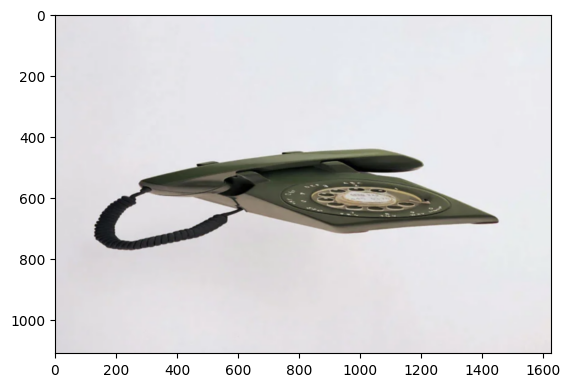

In [118]:
plt.imshow(phone)

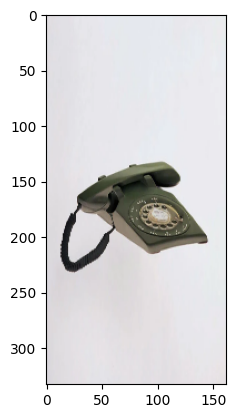

In [119]:
height, width = phone.shape[:2]
lx, ly = 0.1, 0.3
solve_and_print(phone, Sc(lx, ly), (int)(height*ly), (int)(width*lx))

#Череп

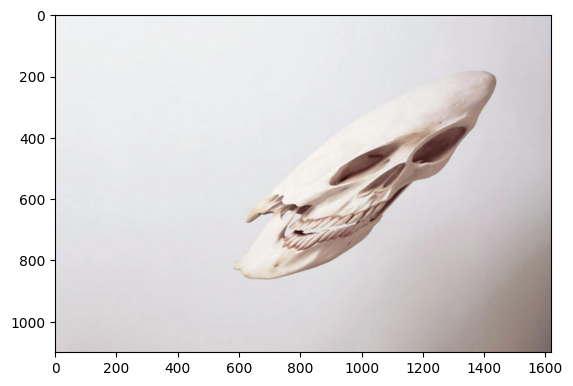

In [120]:
plt.imshow(skull)

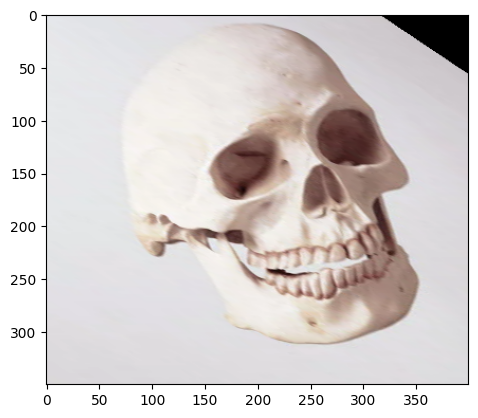

In [121]:
height, width = skull.shape[:2]
lxSh, lySh = 1, 0.5
lxSc, lySc = 0.5, 1
angel = -26.5
solve_and_print(skull, T(-620, -495)@Sc(lxSc, lySc)@R(angel, height,width) @ Sh(lxSh, lySh), 350, 400)

#Текст

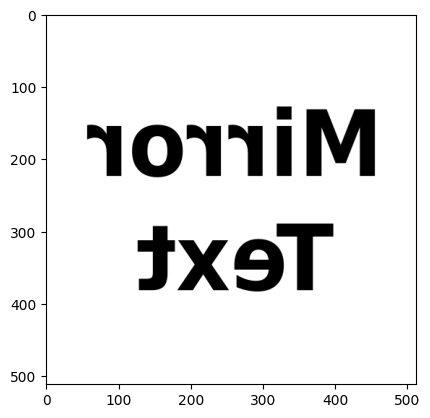

In [122]:
plt.imshow(text)

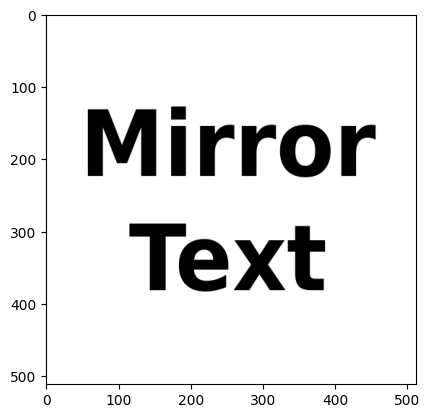

In [123]:
height, width = text.shape[:2]
solve_and_print(text, M(height, width), height, width)